# Genre IDs


The numbers under "genre" column in tmdb.movies dataset and corresponding genres

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

(0.0, 1.0, 0.0, 1.0)

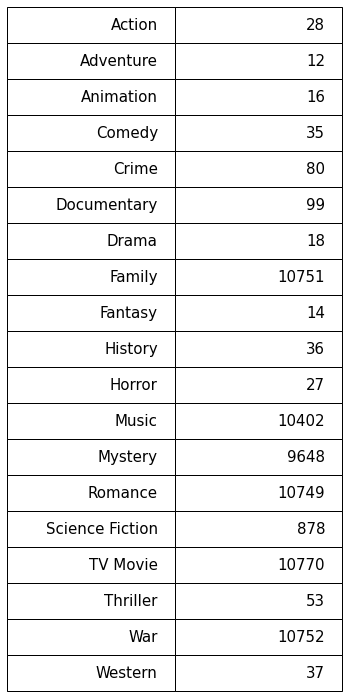

In [163]:
fig, ax = plt.subplots()
table_data=[
    ["Action" ,28],
    ["Adventure" ,12],
    ["Animation", 16],
    ["Comedy" ,35],
    ["Crime" ,80],
    ["Documentary" ,99],
    ["Drama", 18],
    ["Family", 10751],
    ["Fantasy", 14],
    ["History", 36],
    ["Horror" ,27],
    ["Music",10402],
    ["Mystery" ,9648],
    ["Romance" ,10749],
    ["Science Fiction", 878],
    ["TV Movie",10770],
    ["Thriller",53],
    ["War",10752],
    ["Western", 37]
]
table = ax.table(cellText=table_data, loc='center')
table.set_fontsize(15)
table.scale(1,3)
ax.axis('off')

In [164]:
tmdb=pd.read_csv('C:/Users/Beyza/documents/flatiron/phase 1/DS-NATL-010923/p1_project/Microsoft-Pitch/zippedData/tmdb.movies.csv.gz', skipinitialspace=True)

In [165]:
tmdb['release_date'] = pd.to_datetime(tmdb['release_date'])

print(type(tmdb.release_date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [166]:
tmdb.sort_values(by='release_date', inplace=True)
tmdb.tail(100)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
25438,25438,"[35, 10749]",551701,en,Jingle Around the Clock,1.997,2018-12-22,Jingle Around the Clock,8.7,3
25469,25469,[27],517939,en,Paranormal Demons,1.940,2018-12-23,Paranormal Demons,6.3,4
25293,25293,"[10751, 10770]",555281,en,Christmas Bells Are Ringing,2.308,2018-12-23,Christmas Bells Are Ringing,6.3,4
26080,26080,"[27, 18]",578680,en,Transmissions,0.753,2018-12-23,Transmissions,8.5,2
25042,25042,"[10770, 10749]",550035,en,Christmas Made to Order,3.168,2018-12-23,Christmas Made to Order,7.3,3
...,...,...,...,...,...,...,...,...,...,...
24819,24819,[18],481880,en,Trial by Fire,4.480,2019-05-17,Trial by Fire,7.0,3
24003,24003,"[18, 9648, 53]",411144,en,We Have Always Lived in the Castle,14.028,2019-05-17,We Have Always Lived in the Castle,5.2,24
24892,24892,[99],541577,en,This Changes Everything,3.955,2019-06-28,This Changes Everything,0.0,1
24265,24265,"[10749, 18]",428836,en,Ophelia,8.715,2019-06-28,Ophelia,0.0,4


# Data Cleaning

According to The Movie Database API, The Movie Database determines the popularity scores based on factors not limited to but including:

    ->Number of votes for the day
    ->Number of views for the day
    ->Release date
    ->Number of total votes
 

In [167]:
del tmdb['Unnamed: 0']
del tmdb['original_language']
del tmdb['vote_count']
del tmdb['original_title']
del tmdb['vote_average']
del tmdb['id']


In [168]:

tmdb=tmdb.loc[(tmdb['release_date'] >= '2016-01-01')
                     & (tmdb['release_date'] < '2019-12-30')]
tmdb.sort_values(by='popularity',ascending=False,inplace=True)
tmdb.head(10)

,genre_ids,popularity,release_date,title
23811,"[12, 28, 14]",80.773,2018-04-27,Avengers: Infinity War
23812,"[28, 12, 16, 878, 35]",60.534,2018-12-14,Spider-Man: Into the Spider-Verse
23813,"[878, 28, 53]",48.571,2017-10-06,Blade Runner 2049
20617,"[878, 28, 53]",48.571,2017-10-06,Blade Runner 2049
23814,[12],48.508,2018-11-16,Fantastic Beasts: The Crimes of Grindelwald
23815,"[10751, 16, 35, 14, 12]",48.057,2018-11-21,Ralph Breaks the Internet
20618,"[28, 12, 878, 18]",46.775,2017-07-07,Spider-Man: Homecoming
20619,"[53, 28, 80]",45.253,2017-02-10,John Wick: Chapter 2
20620,"[28, 18, 878]",45.000,2017-03-03,Logan
23816,"[28, 12, 878, 35]",44.729,2018-07-06,Ant-Man and the Wasp


In [169]:
tmdb=tmdb.head(-8937)

In [170]:
tmdb = tmdb[['title', 'release_date', 'popularity']]

In [171]:
tmdb.columns = tmdb.columns.str.title() 
tmdb.rename(columns={"Release_Date" : "Release Date"}, inplace=True)


In [172]:
tmdb.drop_duplicates(subset=['Title'], keep='last')


,Title,Release Date,Popularity
23811,Avengers: Infinity War,2018-04-27,80.773
23812,Spider-Man: Into the Spider-Verse,2018-12-14,60.534
20617,Blade Runner 2049,2017-10-06,48.571
23814,Fantastic Beasts: The Crimes of Grindelwald,2018-11-16,48.508
23815,Ralph Breaks the Internet,2018-11-21,48.057
20618,Spider-Man: Homecoming,2017-07-07,46.775
20619,John Wick: Chapter 2,2017-02-10,45.253
20620,Logan,2017-03-03,45.000
23816,Ant-Man and the Wasp,2018-07-06,44.729
23817,Black Panther,2018-02-16,44.140


# Pie Chart

The pie chart showing the percentages of most recurring genres of the top 50 movies based on popularity from 2016 to 2019

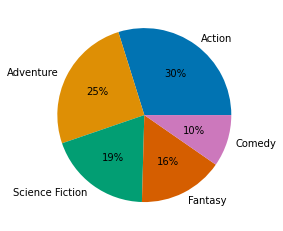

In [173]:
data = [34, 29, 22, 18, 11]
keys = ['Action', 'Adventure', 'Science Fiction', 'Fantasy', 'Comedy']
palette_color = sb.color_palette('colorblind')
plt.pie(data, labels=keys, colors=palette_color,autopct='%.0f%%')
plt.show()